Spotify Music Project Code

In [1]:
import pandas as pd
import sys

print(f"Pandas version: {pd.__version__}")
print(f"Python version: {sys.version}")


Pandas version: 2.2.3
Python version: 3.9.0 (tags/v3.9.0:9cf6752, Oct  5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]


In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

In [4]:
# Remove rows where popularity is 0
data_filtered = data[data['popularity'] > 0]



# Print the size of the new dataset
print(f"Original dataset size: {data.shape[0]}")
print(f"Filtered dataset size: {data_filtered.shape[0]}")


Original dataset size: 170653
Filtered dataset size: 142761


In [5]:
print(data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 142761 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           142761 non-null  float64
 1   year              142761 non-null  int64  
 2   acousticness      142761 non-null  float64
 3   artists           142761 non-null  object 
 4   danceability      142761 non-null  float64
 5   duration_ms       142761 non-null  int64  
 6   energy            142761 non-null  float64
 7   explicit          142761 non-null  int64  
 8   id                142761 non-null  object 
 9   instrumentalness  142761 non-null  float64
 10  key               142761 non-null  int64  
 11  liveness          142761 non-null  float64
 12  loudness          142761 non-null  float64
 13  mode              142761 non-null  int64  
 14  name              142761 non-null  object 
 15  popularity        142761 non-null  int64  
 16  release_date      142761 

In [6]:

print(data_filtered.iloc[0])


valence                                                        0.0594
year                                                             1921
acousticness                                                    0.982
artists             ['Sergei Rachmaninoff', 'James Levine', 'Berli...
danceability                                                    0.279
duration_ms                                                    831667
energy                                                          0.211
explicit                                                            0
id                                             4BJqT0PrAfrxzMOxytFOIz
instrumentalness                                                0.878
key                                                                10
liveness                                                        0.665
loudness                                                      -20.096
mode                                                                1
name                

In [7]:
print(len(data_filtered))

142761


Data Analysis

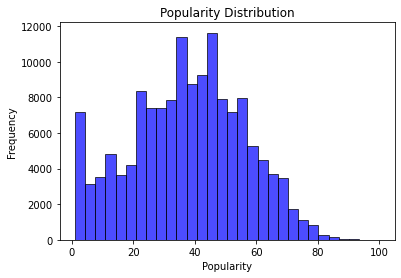

Mean: 37.572796492039146
Variance: 338.7426429844247
Count of zero popularity: 0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt


popularity = data_filtered['popularity']


mean_popularity = popularity.mean()
variance_popularity = popularity.var()
count_zero_popularity = (popularity == 0).sum()


plt.hist(popularity, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")

plt.savefig('popularity_distribution.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

plt.show()



print(f"Mean: {mean_popularity}")
print(f"Variance: {variance_popularity}")
print(f"Count of zero popularity: {count_zero_popularity}")


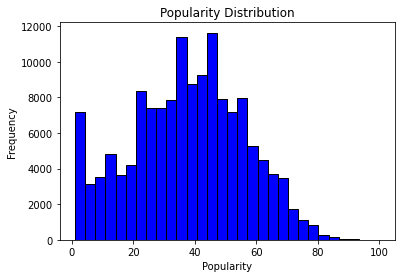

In [9]:
# Popularity distribution
plt.hist(data_filtered['popularity'], bins=30, color='blue', edgecolor='black')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()




In [10]:

numeric_data = data_filtered.select_dtypes(include=['number'])

correlation = numeric_data.corr()['popularity'].sort_values(ascending=False)

print("Correlation with Popularity:\n", correlation)

Correlation with Popularity:
 popularity          1.000000
year                0.814878
loudness            0.409011
energy              0.381045
explicit            0.277534
danceability        0.207804
tempo               0.083886
duration_ms         0.034130
key                 0.011153
valence            -0.006566
speechiness        -0.020426
mode               -0.050812
liveness           -0.067876
instrumentalness   -0.211316
acousticness       -0.467520
Name: popularity, dtype: float64


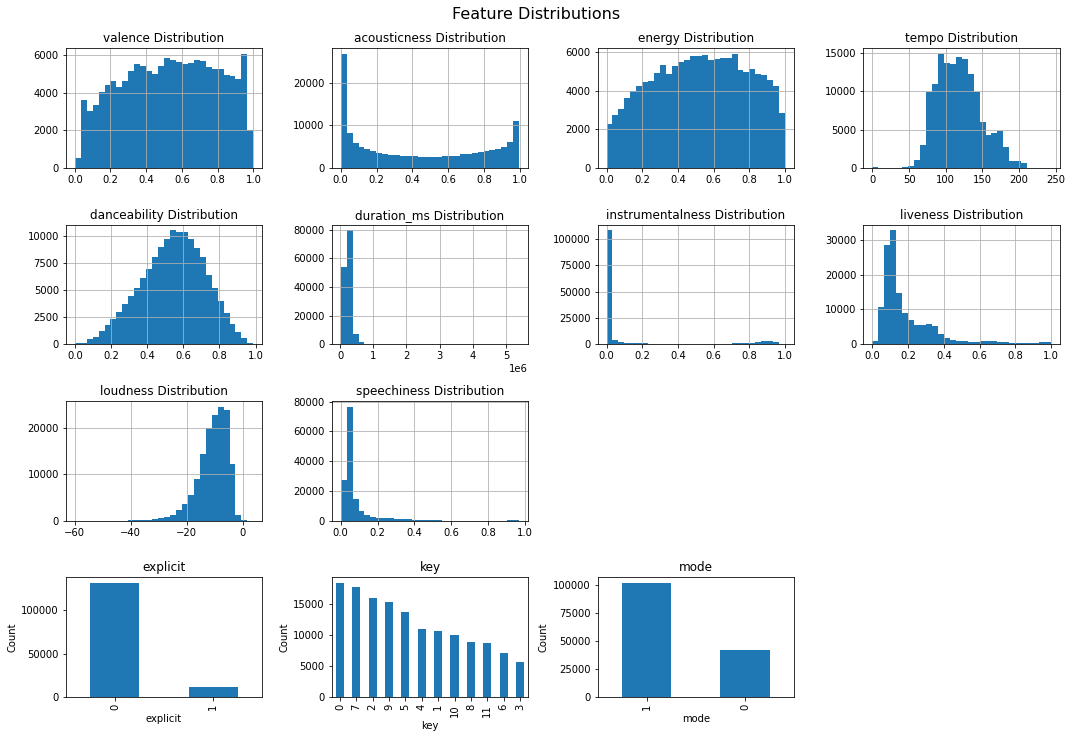

In [44]:
import matplotlib.pyplot as plt

# Numerical feature distribution
numerical_features = ['valence', 'acousticness', 'energy', 'tempo', 'danceability', 
                      'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness']

fig, axs = plt.subplots(4, 4, figsize=(15, 10))


for i, feature in enumerate(numerical_features):
    ax = axs[i // 4, i % 4] 
    data_filtered[feature].hist(bins=30, ax=ax)
    ax.set_title(f'{feature} Distribution')

# Categorical feature distribution
categorical_features = ['explicit', 'key', 'mode']

for i, feature in enumerate(categorical_features):
    ax = axs[3, i]  
    data_filtered[feature].value_counts().plot(kind='bar', ax=ax, title=feature)
    
    ax.set_ylabel('Count')

axs[2, 2].axis('off')
axs[2, 3].axis('off')
axs[3, 3].axis('off')

plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16, y=1.02)

plt.savefig('Feature_distributions.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

plt.show()



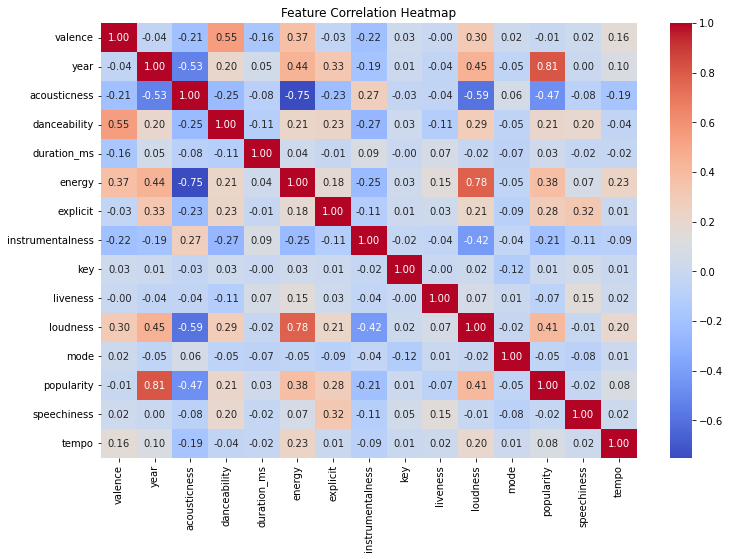

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data_filtered.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")

plt.savefig('Feature_Correlation_Heatmap.png', format='png', dpi=300, bbox_inches='tight')

plt.show()



In [13]:
from sklearn.preprocessing import StandardScaler

##t-NSE
numerical_features = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'duration_ms']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_filtered[numerical_features])



In [14]:
'''
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(X_scaled)


data_filtered['t-SNE_1'] = tsne_results[:, 0]
data_filtered['t-SNE_2'] = tsne_results[:, 1]


plt.figure(figsize=(10, 8))
plt.scatter(data_filtered['t-SNE_1'], data_filtered['t-SNE_2'], alpha=0.6, s=10, c=data_filtered['popularity'], cmap='viridis')
plt.colorbar(label='Popularity')
plt.title('t-SNE Visualization of Songs')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
'''


"\nfrom sklearn.manifold import TSNE\nimport matplotlib.pyplot as plt\n\n\ntsne = TSNE(n_components=2, random_state=42, perplexity=30)\ntsne_results = tsne.fit_transform(X_scaled)\n\n\ndata_filtered['t-SNE_1'] = tsne_results[:, 0]\ndata_filtered['t-SNE_2'] = tsne_results[:, 1]\n\n\nplt.figure(figsize=(10, 8))\nplt.scatter(data_filtered['t-SNE_1'], data_filtered['t-SNE_2'], alpha=0.6, s=10, c=data_filtered['popularity'], cmap='viridis')\nplt.colorbar(label='Popularity')\nplt.title('t-SNE Visualization of Songs')\nplt.xlabel('t-SNE Dimension 1')\nplt.ylabel('t-SNE Dimension 2')\nplt.show()\n"

c:\Users\zfy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\zfy\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


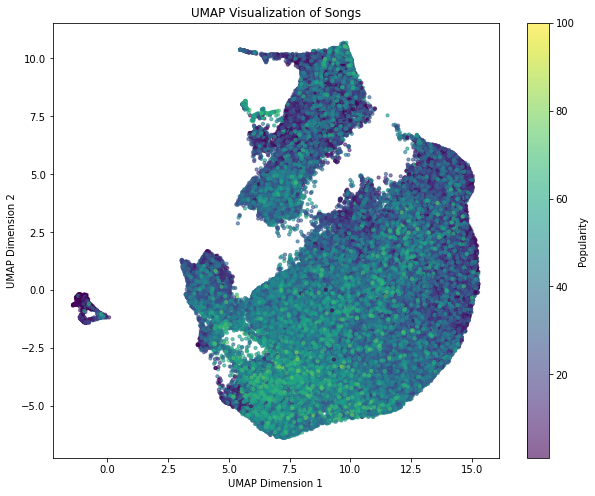

In [46]:
import umap.umap_ as umap

# Initialize UMAP
reducer = umap.UMAP(n_components=2, random_state=42)

# Example data (replace X_scaled with your dataset)
umap_results = reducer.fit_transform(X_scaled)

# Plot UMAP results
plt.figure(figsize=(10, 8))
plt.scatter(umap_results[:, 0], umap_results[:, 1], alpha=0.6, s=10, c=data_filtered['popularity'], cmap='viridis')
plt.colorbar(label='Popularity')
plt.title('UMAP Visualization of Songs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.savefig('Umap_Visualization.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

##According to the UMAP visual analysis, songs with high popularity and songs with low popularity tend to form different clusters respectively. 
# This may means that highly popular songs may have certain characteristics in common.


Model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Separate target variable and features
y = data_filtered['popularity']
X = data_filtered.drop(columns=['popularity', 'artists', 'name', 'id', 'release_date'])

# Identify categorical and numerical features
categorical_features = ['explicit', 'key', 'mode']
numerical_features = ['valence', 'acousticness', 'energy', 'tempo', 'danceability', 
                      'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply transformations
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)




In [19]:
print("Processed Data Shape:", X_processed.shape)  
print("First 5 Rows of Processed Data:")
print(X_processed[:5])  

Processed Data Shape: (142761, 26)
First 5 Rows of Processed Data:
[[-1.80240438  1.53646051 -1.19128773 -1.23425384 -1.51791745  5.02514844
   2.63961848  2.61874245 -1.72745746 -0.3817072   1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.        ]
 [ 1.64356261  0.83537372 -0.69580304 -1.89308342  1.57477449 -0.45119502
  -0.46573186 -0.24020857 -0.31342991  2.93882154  1.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.        ]
 [-1.87867633  1.47756922 -1.36280167 -0.26713888 -1.23728429  2.23619429
   2.76340808 -0.57422463 -0.75841912 -0.40540019  1.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]
 [-1.39968845  1.4943953  -0.8177685

In [20]:
#model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [21]:
# Train the model
rf_model.fit(X_train, y_train)


# Predict on the test set
y_pred = rf_model.predict(X_test)



In [22]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 183.26181904094977
R2 Score: 0.4642899720315685


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=3, scoring='r2', verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Use the best model
best_rf_model = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Train the Random Forest model with the best parameters
optimized_rf_model = RandomForestRegressor(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=392,
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=9, n_estimators=392, random_state=42)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred_optimized = optimized_rf_model.predict(X_test)

# Evaluate performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model Mean Squared Error: {mse_optimized}")
print(f"Optimized Model R2 Score: {r2_optimized}")


Optimized Model Mean Squared Error: 180.01862501299004
Optimized Model R2 Score: 0.4737704605071147


Model Analysis

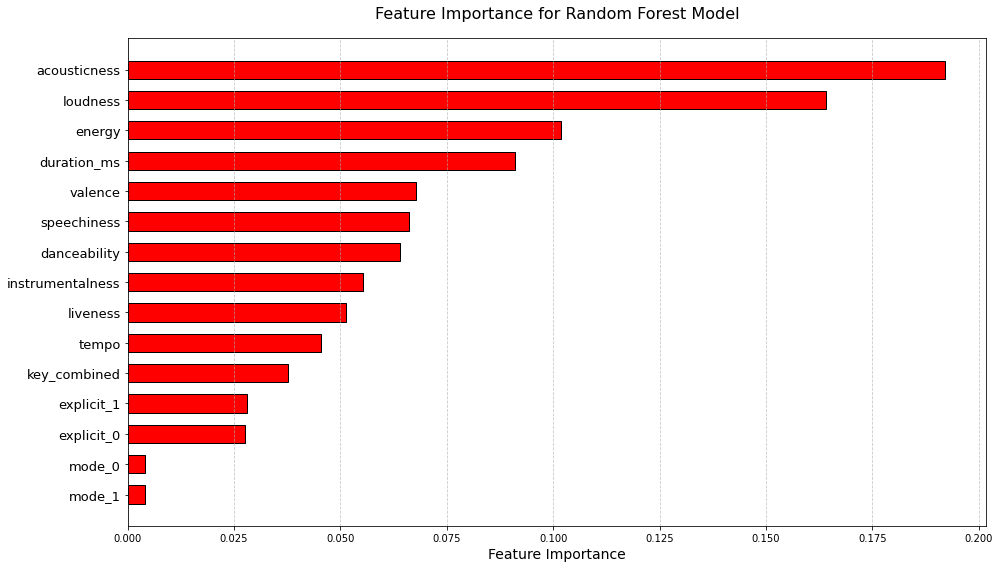

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Combine 'key' features
feature_names_combined = []
feature_importance_combined = []


feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Extract feature importance from the trained Random Forest model
feature_importance = optimized_rf_model.feature_importances_



for i, feature in enumerate(feature_names):
    if "key" in feature:
        if "key_combined" not in feature_names_combined:
            feature_names_combined.append("key_combined")
            feature_importance_combined.append(feature_importance[i])
        else:
            feature_importance_combined[-1] += feature_importance[i]
    else:
        feature_names_combined.append(feature)
        feature_importance_combined.append(feature_importance[i])

# Sort features by importance (descending order)
sorted_indices = np.argsort(feature_importance_combined)[::-1]
sorted_feature_names = [feature_names_combined[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance_combined[i] for i in sorted_indices]

# Plot feature importance
plt.figure(figsize=(14, 8))
plt.barh(
    sorted_feature_names,
    sorted_feature_importance,
    color="red",
    edgecolor="black",
    height=0.6,
)
plt.xlabel("Feature Importance", fontsize=14)
plt.title("Feature Importance for Random Forest Model", fontsize=16, pad=20)

# Customize y-axis tick labels to blue
plt.gca().invert_yaxis()  
plt.gca().tick_params(axis='y', colors='black',labelsize=13)  

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.savefig('Feature_Importance.png', format='png', dpi=300, bbox_inches='tight')


plt.show()





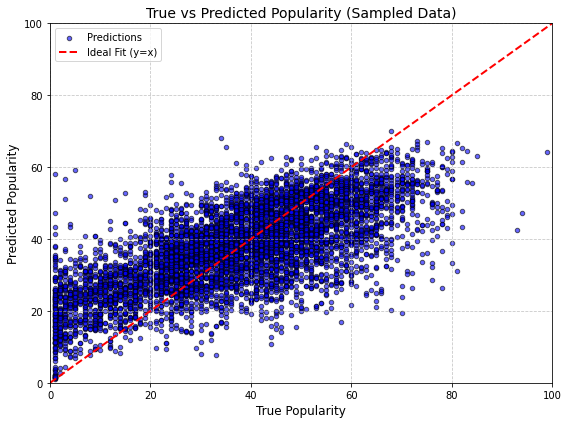

In [52]:
import numpy as np

# Randomly sample 20% of the data for plotting
sample_indices = np.random.choice(len(y_test), size=int(0.2 * len(y_test)), replace=False)

# Create scatter plot with sampled data
plt.figure(figsize=(8, 6))
plt.scatter(
    y_test.iloc[sample_indices], 
    y_pred_optimized[sample_indices], 
    alpha=0.6, color="blue", edgecolor="k", s=20, label="Predictions"
)
plt.plot([0, 100], [0, 100], color="red", linestyle="--", linewidth=2, label="Ideal Fit (y=x)")
plt.xlabel("True Popularity", fontsize=12)
plt.ylabel("Predicted Popularity", fontsize=12)
plt.title("True vs Predicted Popularity (Sampled Data)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.savefig('True_Predict_Popularity.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


Optimized Model Residual Mean: -0.04496767180601917
Optimized Model Residual Variance: 180.02290778989516


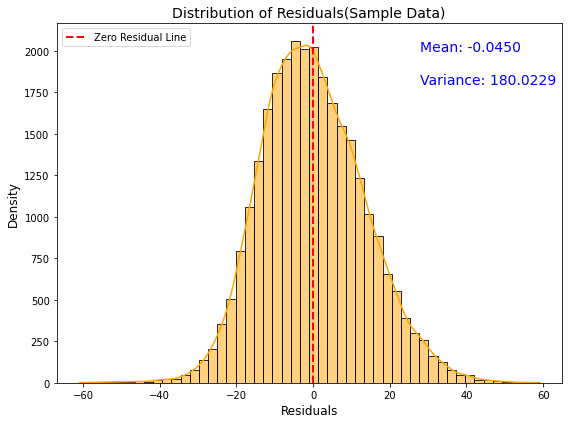

In [65]:
import seaborn as sns


# Calculate residuals
residuals = y_test - y_pred_optimized

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50, color="orange")
plt.axvline(x=0, color="red", linestyle="--", linewidth=2, label="Zero Residual Line")
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Residuals(Sample Data)", fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()
residual_mean = residuals.mean()
residual_variance = residuals.var()
print(f"Optimized Model Residual Mean: {residual_mean}")
print(f"Optimized Model Residual Variance: {residual_variance}")

plt.text(28, 2000, f"Mean: {residual_mean:.4f}", fontsize=14, color='blue')
plt.text(28, 1800, f"Variance: {residual_variance:.4f}", fontsize=14, color='blue')

plt.savefig('Distribution_of_Residuals.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


